In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
import torch
import h5py
import torch.fft
import os

from filters import create_gaussian_filters, apply_gaussian_filter
from ifft import ifft3d
from plot import (
    plot_coil_images,
    plot_recon_comparison,
    plot_phillips_recon,
    interactive_plot,
)

In [3]:
dataset_path = "/gpfs/data/karczmar-lab/hyperfast/9127-837-hyperfast/wa_07022024_1006375_9_2_wip_dyn_ethrive_ufast_bv1.6s_ldV4_mix0_stack0.h5"
phillips_recon_path = (
    "/gpfs/data/karczmar-lab/hyperfast/9127-837-hyperfast/IMG_SENSE.mat"
)
precon_recon_path = (
    "/gpfs/data/karczmar-lab/hyperfast/9127-837-hyperfast/precon_recon.h5"
)

In [4]:
with h5py.File(dataset_path, "r") as f:
    kspace = torch.from_numpy(f["kspace"][()].squeeze())
    tr = f["temporal_resolution"][()].squeeze()
with h5py.File(precon_recon_path, "r") as f:
    precon_recon = torch.from_numpy(f["data_0_0"][()].squeeze())
with h5py.File(phillips_recon_path, "r") as f:
    phillips_recon = torch.from_numpy(f["IMG_SENSE"][()].squeeze().T)

In [5]:
nx, ny, nz, nc, nt = kspace.shape
print(f"nx={nx}, ny={ny}, nz={nz}, nc={nc}, nt={nt}")
gaussian_filters = create_gaussian_filters(nx, ny, sigma_base=35)

nx=172, ny=40, nz=20, nc=16, nt=65
created gaussian filters in 1e-02s


In [6]:
filtered_kspace = apply_gaussian_filter(kspace, gaussian_filters)

applied filter in 0.1s


In [7]:
filtered_img_space = ifft3d(filtered_kspace)

completed ifft3d in 1.53 seconds


In [8]:
img_space = ifft3d(kspace)

completed ifft3d in 1.58 seconds


In [9]:
os.makedirs("plots", exist_ok=True)

Nan values detected in precon


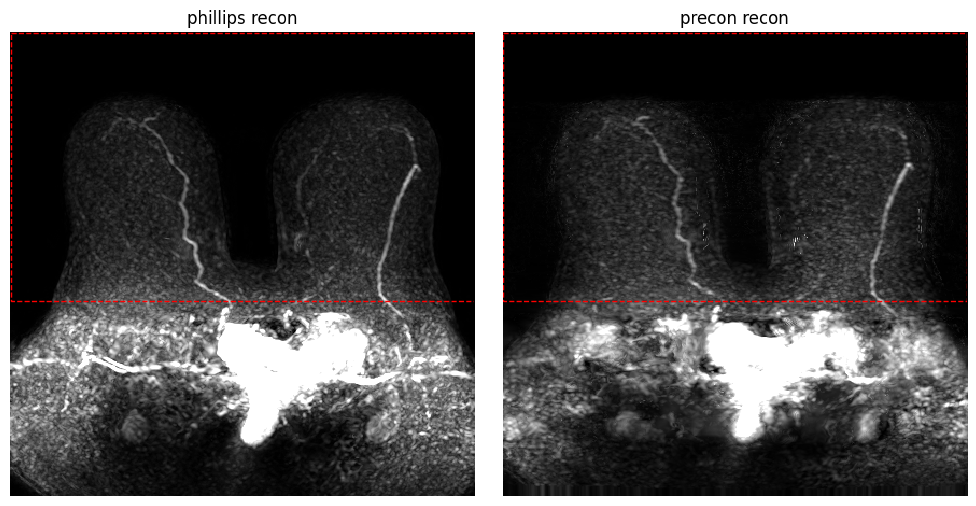

In [10]:
plot_recon_comparison(
    phillips_recon,
    precon_recon,
    21,
    tr,
    n_subtract=4,
    window=250,
)

In [14]:
interactive_plot(
    plot_coil_images,
    img_space,
    tr,
    n_subtract=4,
    window=100,
    start_value=21,
    tag="unfiltered kspace",
)

interactive(children=(IntSlider(value=21, description='time index', max=64), Output()), _dom_classes=('widget-…

In [15]:
interactive_plot(
    plot_coil_images,
    filtered_img_space,
    tr,
    n_subtract=4,
    window=100,
    start_value=21,
    tag="filtered kspace",
)

interactive(children=(IntSlider(value=21, description='time index', max=64), Output()), _dom_classes=('widget-…

In [13]:
interactive_plot(
    plot_phillips_recon,
    phillips_recon,
    tr,
    n_subtract=4,
    window=250,
    start_value=21,
    # lower_percentile=3,
    # upper_percentile=99.99,
)

interactive(children=(IntSlider(value=21, description='time index', max=64), Output()), _dom_classes=('widget-…